# Section 1) Data set name submission 

Importing All the required Packages

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob
import pickle

Create Dataset Function

In [29]:
def createDataset():
    img_dims = (96,96,3)
    dataset=[]
    data = []
    data1=[]
    labels = []
    raw_images=[]
    image_files = [f for f in glob.glob(r'C:\Files\gender_dataset_face' + "/**/*", recursive=True) if not os.path.isdir(f)]
    random.shuffle(image_files)
    for img in image_files:
        image = cv2.imread(img)
        image = cv2.resize(image, (img_dims[0],img_dims[1]))
        raw_images.append(image)
        image = img_to_array(image)
        data.append(image)
        label = img.split(os.path.sep)[-2] # C:\Files\gender_dataset_face\woman\face_1162.jpg
        if label == "woman":
            label = 1
        else:
            label = 0    
        data1.append([image,label])
        labels.append([label]) # [[1], [0], [0], ...]
        dataset=[data,labels,raw_images,data1]
    
    return dataset

To create the dataset as a pickle file we are calling createDataset Function

In [30]:
#create a pickle file to export the dataset
pickleOut = open('jayam_week10_data.pkl','wb')
#calling the function
pickle.dump(createDataset(),pickleOut)
pickleOut.close()

# Section2) Explain your dataset, how it is composed, and how you collected it

Dataset collection method
1.Since our aim is to train a model so that it can detect the human as male or female, and it require both male and female images, we downloaded the images of indian movie actors, since they are easily available in the internet.

# Data composition
FolderStructure
* 1.gender_dataset_face/woman
* 2.gender_dataset_face/man

In CreateDataset function, 
1.The function takes each image in the folder i.Woman and ii.Man and resize it to the desired dimensions(96 X 96) as per our function.
2.After that it will convert the image into image array and saves the image array into data(which is a list).
3.Here we are labelling the data based on folder name, first we are saving the path into a string and splitting the path and getting the folder names, it gives us the label and saving the labels and saving the labels into labels(which is a list).

The dataset will be stored as pickle file("jayam_week10_data.pkl")


# Section 3) Load of the data set
We are loading the dataset genderDetectionData

In [31]:
pickleIn = open('jayam_week10_data.pkl','rb')
genderDetectionData=pickle.load(pickleIn)

In [32]:
len(genderDetectionData)
print(type(genderDetectionData))

<class 'list'>


In [50]:
#Unpacking the genderDetectionData which is a list
images_data,data_Label,raw_images,data_label=genderDetectionData
data=images_data
labels=data_Label


# Section 4) Show me your data!!!!!!!


In [47]:
print(images_data[0].shape)
print(type(raw_images))

(96, 96, 3)
<class 'list'>


Displaying the top 10 images

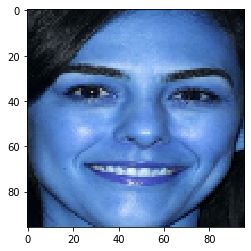

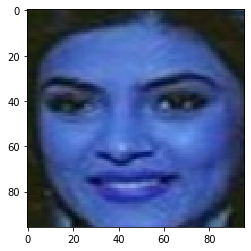

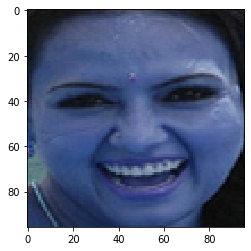

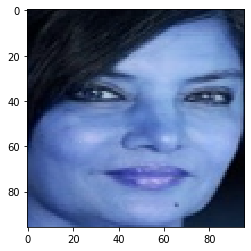

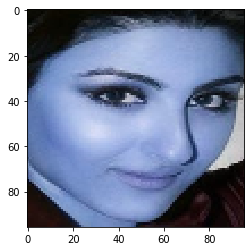

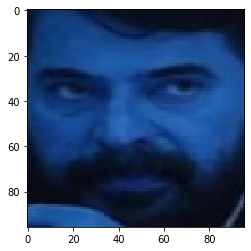

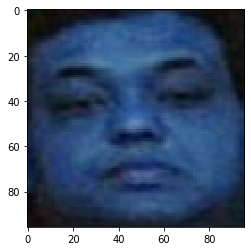

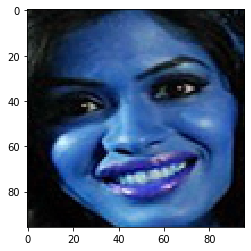

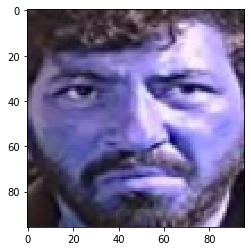

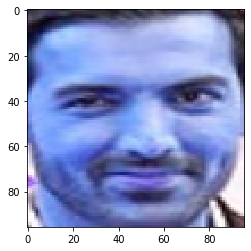

In [34]:
for each in raw_images[:10]:
    plt.imshow(each,cmap='gray')
    plt.show()

PreProcessing the Data

In [35]:
data = np.array(images_data, dtype="float") / 255.0
labels = np.array(data_label)

In [37]:
#Length of the data
print(len(images_data),len(data_label))

738 738


Some insights about data

In [41]:
print(type(data),type(labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


# Split dataset to training and testing

The dataset is splitted into 80% train dataset and 20% test dataset

In [51]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)